# RBC Model
 0.0.1 --> started 20 Jan 2023
 
0.0.2--> 2 feb (starting to do ICA, cleaning up simualtion logger notes, maybe NMF)

In [1]:
import os
import re
import warnings
# from cobra.io import *
from cobra.io.json import load_json_model as load_json_cobra_model
import escher
import mass
import numpy as np
import pandas as pd
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_
import sympy as sym
from cobra import Model, Reaction, Metabolite
import cobra.test
from os.path import join
from mass.util import qcqa
from mass.util import qcqa_model
from cobra import DictList
from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io.json import save_json_model as save_json_mass_model
from mass.visualization import plot_comparison, plot_time_profile
from mass.visualization import (
    plot_ensemble_phase_portrait, plot_ensemble_time_profile)
mass_config = MassConfiguration()
mass_config.irreversible_Keq = float("inf")
print("MASSpy version: {0}".format(mass.__version__))
from six import iteritems
import matplotlib.pyplot as plt
from mass.thermo import (
    ConcSolver, sample_concentrations,
    update_model_with_concentration_solution)
# from cobra.io.json import *
import cobra_dict as c_d
import csv
import altair as alt
from minspan.minspan import minspan,nnz
from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io import json, sbml
from mass.util import qcqa_model

mass_config = MassConfiguration()

mass_config.irreversible_Keq = float("inf")
# from minspan import minspan,nnz

MASSpy version: 0.1.6


In [2]:
maps_dir = os.path.abspath("maps")
data_dir = os.path.abspath("data")
dir = os.path.abspath("")
model_dir = os.path.abspath("models")
minspan_dir= os.path.abspath("minspans_csv")
# extra_dir=os.path.abspath("..")
# minspan_dir

### Getting reactions and metabolite data from RECON 3D

In [3]:
# making dataframe of metabolites

csv_met = os.path.join(data_dir,"rbc_met_gluco.csv")
met_csv_df = pd.read_csv(csv_met,index_col="id")
metabolite_info=met_csv_df.to_dict(orient='index')


### Loading MASS model

In [4]:
ppp = MassModel("PentosePhosphatePathway")


Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-02


In [5]:
#  Add all the remaining metabolites involved in the pathway
# for met_id, info in metabolite_info.items():
#     met = MassMetabolite(met_id, name=info['name'], formula=info['formula'], 
#                            charge=info['charge'], compartment=info['compartment'])
#     glycolysis.add_metabolites(met)

In [6]:
import json

In [7]:
# Loading reaction data as JSON file to maintain data types as dictionaries 
rxn_json = os.path.join(data_dir,"rbc_rxn_glyco.json")
with open(rxn_json) as json_file:
    rxn_data = json.load(json_file)

In [8]:
# for reaction, info in rxn_data.items():
#     reaction_obj = MassReaction(reaction)
#     reaction_obj.id=reaction
#     reaction= reaction_obj.id
#     reaction_obj.lower_bound = info['lower_bound']
#     reaction_obj.upper_bound = info['upper_bound']
#     reaction_obj.name = info['name']
#     glycolysis.add_reaction(reaction_obj)
#     temp=info['metabolites']
#     reaction_obj.add_metabolites(temp)
#     print(reaction)

In [9]:
g6p_c = MassMetabolite(
    "g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

_6pgl_c = MassMetabolite(
    "_6pgl_c",
    name="6-Phospho-D-gluco-1,5-lactone",
    formula="C6H9O9P",
    charge=-2,
    compartment="c",
    fixed=False)

_6pgc_c = MassMetabolite(
    "_6pgc_c",
    name="6-Phospho-D-gluconate",
    formula="C6H10O10P",
    charge=-3,
    compartment="c",
    fixed=False)

ru5p__D_c = MassMetabolite(
    "ru5p__D_c",
    name="D-Ribulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

r5p_c = MassMetabolite(
    "r5p_c",
    name="Alpha-D-Ribose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

xu5p__D_c = MassMetabolite(
    "xu5p__D_c",
    name="D-Xylulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

g3p_c = MassMetabolite(
    "g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

s7p_c = MassMetabolite(
    "s7p_c",
    name="Sedoheptulose 7-phosphate",
    formula="C7H13O10P",
    charge=-2,
    compartment="c",
    fixed=False)

f6p_c = MassMetabolite(
    "f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

e4p_c = MassMetabolite(
    "e4p_c",
    name="D-Erythrose 4-phosphate",
    formula="C4H7O7P",
    charge=-2,
    compartment="c",
    fixed=False)

h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c",
    fixed=False)

nadp_c = MassMetabolite(
    "nadp_c",
    name="Nicotinamide adenine dinucleotide phosphate",
    formula="[NADP]-C21H25N7O17P3",
    charge=-3,
    compartment="c",
    fixed=False)

nadph_c = MassMetabolite(
    "nadph_c",
    name="Nicotinamide adenine dinucleotide phosphate - reduced",
    formula="[NADP]-C21H26N7O17P3",
    charge=-4,
    compartment="c",
    fixed=False)

h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c",
    fixed=False)

gthox_c = MassMetabolite(
    "gthox_c",
    name="Oxidized glutathione",
    formula="C20H30N6O12S2",
    charge=-2,
    compartment="c",
    fixed=False)

gthrd_c = MassMetabolite(
    "gthrd_c",
    name="Reduced glutathione",
    formula="C10H16N3O6S",
    charge=-1,
    compartment="c",
    fixed=False)

co2_c = MassMetabolite(
    "co2_c",
    name="CO2",
    formula="CO2",
    charge=0,
    compartment="c",
    fixed=False)

In [10]:
G6PDH2r = MassReaction(
    "G6PDH2r",
    name="Glucose 6-phosphate dehydrogenase",
    subsystem=ppp.id,
    reversible=True)
G6PDH2r.add_metabolites({
    g6p_c: -1,
    nadp_c: -1,
    _6pgl_c: 1,
    nadph_c: 1,
    h_c: 1})

PGL = MassReaction(
    "PGL",
    name="6-phosphogluconolactonase",
    subsystem=ppp.id,
    reversible=True)
PGL.add_metabolites({
    _6pgl_c: -1,
    h2o_c: -1,
    _6pgc_c: 1,
    h_c: 1})

GND = MassReaction(
    "GND",
    name="Phosphogluconate dehydrogenase",
    subsystem=ppp.id,
    reversible=True)
GND.add_metabolites({
    _6pgc_c: -1,
    nadp_c: -1,
    nadph_c: 1,
    co2_c: 1,
    ru5p__D_c: 1})

RPI = MassReaction(
    "RPI",
    name="Ribulose 5-Phosphate Isomerase",
    subsystem=ppp.id,
    reversible=True)
RPI.add_metabolites({
    ru5p__D_c: -1,
    r5p_c: 1})

RPE = MassReaction(
    "RPE",
    name="Ribulose 5-phosphate 3-epimerase",
    subsystem=ppp.id,
    reversible=True)
RPE.add_metabolites({
    ru5p__D_c: -1,
    xu5p__D_c: 1})

TKT1 = MassReaction(
    "TKT1",
    name="Transketolase",
    subsystem=ppp.id,
    reversible=True)
TKT1.add_metabolites({
    r5p_c: -1,
    xu5p__D_c: -1,
    g3p_c: 1,
    s7p_c: 1})

TALA = MassReaction(
    "TALA",
    name="Transaldolase",
    subsystem=ppp.id,
    reversible=True)
TALA.add_metabolites({
    g3p_c: -1,
    s7p_c: -1,
    e4p_c: 1,
    f6p_c: 1})

TKT2 = MassReaction(
    "TKT2",
    name="Transketolase",
    subsystem=ppp.id,
    reversible=True)
TKT2.add_metabolites({
    e4p_c: -1,
    xu5p__D_c: -1,
    f6p_c: 1,
    g3p_c: 1})

GTHOr = MassReaction(
    "GTHOr",
    name="Glutathione oxidoreductase",
    subsystem="Misc.",
    reversible=True)
GTHOr.add_metabolites({
    gthox_c: -1,
    h_c: -1,
    nadph_c: -1,
    gthrd_c: 2,
    nadp_c: 1})

GSHR = MassReaction(
    "GSHR",
    name="Glutathione-disulfide reductase",
    subsystem="Misc.",
    reversible=True)
GSHR.add_metabolites({
    gthrd_c: -2,
    gthox_c: 1,
    h_c: 2})

In [11]:
ppp.add_reactions([
    G6PDH2r, PGL, GND, RPI, RPE, TKT1, TALA, TKT2, GTHOr, GSHR])

for reaction in ppp.reactions:
    print(reaction)

G6PDH2r: g6p_c + nadp_c <=> _6pgl_c + h_c + nadph_c
PGL: _6pgl_c + h2o_c <=> _6pgc_c + h_c
GND: _6pgc_c + nadp_c <=> co2_c + nadph_c + ru5p__D_c
RPI: ru5p__D_c <=> r5p_c
RPE: ru5p__D_c <=> xu5p__D_c
TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c
TALA: g3p_c + s7p_c <=> e4p_c + f6p_c
TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c
GTHOr: gthox_c + h_c + nadph_c <=> 2 gthrd_c + nadp_c
GSHR: 2 gthrd_c <=> gthox_c + 2 h_c


In [12]:
# trial.add_boundary(trial.metabolites.get_by_id("nadh_c"), type="sink")
# trial.add_boundary(trial.metabolites.get_by_id("nad_c"), type="sink")


In [13]:
for r in ppp.reactions:
    print(r.id,  r.check_mass_balance())

G6PDH2r {}
PGL {}
GND {}
RPI {}
RPE {}
TKT1 {}
TALA {}
TKT2 {}
GTHOr {}
GSHR {'charge': 2}


In [14]:
# sink_dict = {"SK_glc__D_c":1,
# "SK_lac__L_c": 1,
# "SK_pyr_c": 0.06,
# "SK_h_c":6.30957e-05,
#  "SK_h2o_c": 1,
#  "SK_amp_c": 1,
#  "DM_amp_c": 1}

# for i in sink_dict:
#     # print(sink_dict[i])
#     sink_rxn = glycolysis.boundary
#     sink_rxn.boundary_condition = sink_dict[i]



# glycolysis.reactions.get_by_id("SK_glc__D_c").reverse_stoichiometry(inplace=True)


In [15]:
DM_f6p_c = ppp.add_boundary(
    metabolite=f6p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

DM_r5p_c = ppp.add_boundary(
    metabolite=r5p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

DM_g3p_c = ppp.add_boundary(
    metabolite=g3p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_g6p_c = ppp.add_boundary(
    metabolite=g6p_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_g6p_c.reverse_stoichiometry(inplace=True)

SK_h_c = ppp.add_boundary(
    metabolite=h_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=6.30957e-05)

SK_h2o_c = ppp.add_boundary(
    metabolite=h2o_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_co2_c = ppp.add_boundary(
    metabolite=co2_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

print("Boundary Reactions and Values\n-----------------------------")
for reaction in ppp.boundary:
    boundary_met = reaction.boundary_metabolite
    bc_value = ppp.boundary_conditions.get(boundary_met)
    print("{0}\n{1}: {2}\n".format(
        reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
DM_f6p_c: f6p_c --> 
f6p_b: 1.0

DM_r5p_c: r5p_c --> 
r5p_b: 1.0

DM_g3p_c: g3p_c --> 
g3p_b: 1.0

SK_g6p_c:  <=> g6p_c
g6p_b: 1.0

SK_h_c: h_c <=> 
h_b: 6.30957e-05

SK_h2o_c: h2o_c <=> 
h2o_b: 1.0

SK_co2_c: co2_c <=> 
co2_b: 1.0



In [16]:
new_metabolite_order = [
    "f6p_c", "g6p_c", "g3p_c", "_6pgl_c", "_6pgc_c",
    "ru5p__D_c", "xu5p__D_c", "r5p_c", "s7p_c", "e4p_c",
    "nadp_c", "nadph_c", "gthrd_c", "gthox_c", "co2_c",
    "h_c", "h2o_c"]

if len(ppp.metabolites) == len(new_metabolite_order):
    ppp.metabolites = DictList(
        ppp.metabolites.get_by_any(new_metabolite_order))

new_reaction_order = [
    "G6PDH2r", "PGL", "GND", "RPE", "RPI",
    "TKT1", "TKT2", "TALA", "GTHOr", "GSHR",
    "SK_g6p_c", "DM_f6p_c", "DM_g3p_c","DM_r5p_c",
    "SK_co2_c", "SK_h_c", "SK_h2o_c"]

if len(ppp.reactions) == len(new_reaction_order):
    ppp.reactions = DictList(
        ppp.reactions.get_by_any(new_reaction_order))

ppp.update_S(array_type="DataFrame", dtype=int)

,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,SK_g6p_c,DM_f6p_c,DM_g3p_c,DM_r5p_c,SK_co2_c,SK_h_c,SK_h2o_c
f6p_c,0,0,0,0,0,0,1,1,0,0,0,-1,0,0,0,0,0
g6p_c,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
g3p_c,0,0,0,0,0,1,1,-1,0,0,0,0,-1,0,0,0,0
_6pgl_c,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
_6pgc_c,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ru5p__D_c,0,0,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0
xu5p__D_c,0,0,0,1,0,-1,-1,0,0,0,0,0,0,0,0,0,0
r5p_c,0,0,0,0,1,-1,0,0,0,0,0,0,0,-1,0,0,0
s7p_c,0,0,0,0,0,1,0,-1,0,0,0,0,0,0,0,0,0
e4p_c,0,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0


In [17]:
minspan_paths = [
    [1, 1, 1, 2/3, 1/3, 1/3, 1/3, 1/3, 2, 2, 1, 2/3, 1/3, 0, 1, 4, -1],
    [1, 1, 1,  0,   1,   0,   0,   0,  2, 2, 1,  0,   0,  1, 1, 4, -1]]
ppp.compute_steady_state_fluxes(
    pathways=minspan_paths,
    independent_fluxes={
        SK_g6p_c: 0.21,
        DM_r5p_c: 0.01},
    update_reactions=True)

print("Steady State Fluxes\n-------------------")
for reaction, steady_state_flux in ppp.steady_state_fluxes.items():
    print("{0}: {1:.6f}".format(reaction.flux_symbol_str, steady_state_flux))

Steady State Fluxes
-------------------
v_G6PDH2r: 0.210000
v_PGL: 0.210000
v_GND: 0.210000
v_RPE: 0.133333
v_RPI: 0.076667
v_TKT1: 0.066667
v_TKT2: 0.066667
v_TALA: 0.066667
v_GTHOr: 0.420000
v_GSHR: 0.420000
v_SK_g6p_c: 0.210000
v_DM_f6p_c: 0.133333
v_DM_g3p_c: 0.066667
v_DM_r5p_c: 0.010000
v_SK_co2_c: 0.210000
v_SK_h_c: 0.840000
v_SK_h2o_c: -0.210000


In [18]:
g6p_c.ic = 0.0486
f6p_c.ic = 0.0198
g3p_c.ic = 0.00728
_6pgl_c.ic = 0.00175424
_6pgc_c.ic = 0.0374753
ru5p__D_c.ic = 0.00493679
xu5p__D_c.ic = 0.0147842
r5p_c.ic = 0.0126689
s7p_c.ic = 0.023988
e4p_c.ic = 0.00507507
nadp_c.ic = 0.0002
nadph_c.ic = 0.0658
gthrd_c.ic = 3.2
gthox_c.ic = 0.12
co2_c.ic = 1
h_c.ic = 0.0000714957
h2o_c.ic = 1

print("Initial Conditions\n------------------")
for metabolite, ic_value in ppp.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

ic_info = pd.DataFrame()
met_list =[]
met_conc = []
print("Initial Conditions\n------------------")
for metabolite, ic_value in ppp.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))
    met_list.append(str(metabolite))
    met_conc.append(ic_value)

ic_info["metabolite"] = met_list
ic_info["concentrations"] = met_conc

Initial Conditions
------------------
f6p_c: 0.0198
g6p_c: 0.0486
g3p_c: 0.00728
_6pgl_c: 0.00175424
_6pgc_c: 0.0374753
ru5p__D_c: 0.00493679
xu5p__D_c: 0.0147842
r5p_c: 0.0126689
s7p_c: 0.023988
e4p_c: 0.00507507
nadp_c: 0.0002
nadph_c: 0.0658
gthrd_c: 3.2
gthox_c: 0.12
co2_c: 1
h_c: 7.14957e-05
h2o_c: 1
Initial Conditions
------------------
f6p_c: 0.0198
g6p_c: 0.0486
g3p_c: 0.00728
_6pgl_c: 0.00175424
_6pgc_c: 0.0374753
ru5p__D_c: 0.00493679
xu5p__D_c: 0.0147842
r5p_c: 0.0126689
s7p_c: 0.023988
e4p_c: 0.00507507
nadp_c: 0.0002
nadph_c: 0.0658
gthrd_c: 3.2
gthox_c: 0.12
co2_c: 1
h_c: 7.14957e-05
h2o_c: 1


In [19]:
ic_info=ic_info.set_index('metabolite')
ic_info

,concentrations
metabolite,
f6p_c,0.019800
g6p_c,0.048600
g3p_c,0.007280
_6pgl_c,0.001754
_6pgc_c,0.037475
ru5p__D_c,0.004937
xu5p__D_c,0.014784
r5p_c,0.012669
s7p_c,0.023988


In [20]:
G6PDH2r.Keq = 1000
PGL.Keq = 1000
GND.Keq = 1000
RPE.Keq = 3
RPI.Keq = 2.57
TKT1.Keq = 1.2
TKT2.Keq = 10.3
TALA.Keq = 1.05
GTHOr.Keq = 100
GSHR.Keq = 2

SK_g6p_c.Keq = 1
SK_h_c.Keq = 1
SK_h2o_c.Keq = 1
SK_co2_c.Keq = 1

print("Equilibrium Constants\n---------------------")
for reaction in ppp.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_G6PDH2r: 1000
Keq_PGL: 1000
Keq_GND: 1000
Keq_RPE: 3
Keq_RPI: 2.57
Keq_TKT1: 1.2
Keq_TKT2: 10.3
Keq_TALA: 1.05
Keq_GTHOr: 100
Keq_GSHR: 2
Keq_SK_g6p_c: 1
Keq_DM_f6p_c: inf
Keq_DM_g3p_c: inf
Keq_DM_r5p_c: inf
Keq_SK_co2_c: 1
Keq_SK_h_c: 1
Keq_SK_h2o_c: 1


### Running Concentration QP

In [21]:
for metabolite in ["h_c", 
"h2o_c"]:
    metabolite = ppp.metabolites.get_by_id(metabolite)
    metabolite.ic = 1 #M

In [22]:
#Formulate QP minimization list for concentrations
conc_solver = ConcSolver(
    ppp,
    constraint_buffer=1)

conc_solver.setup_feasible_qp_problem(
fixed_conc_bounds=list(ppp.fixed))
# fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    
#assumption: provide uncertainity to allow for a variance for the Keqs rather than staying fixed
conc_solver.setup_feasible_qp_problem(Keq_percent_deviation=0.1)

conc_solution = conc_solver.optimize()
conc_solution

mass\util\util.py:159 UserWarning: Unrecognized kwargs: ['Keq_percent_deviation']
mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,variables,reduced_costs
f6p_c,0.015704,0.0
g6p_c,0.048600,0.0
g3p_c,0.006276,0.0
_6pgl_c,0.001754,0.0
_6pgc_c,0.037475,0.0
...,...,...
Keq_TKT1,1.754866,0.0
Keq_TKT2,10.300000,0.0
Keq_TALA,1.323829,0.0
Keq_GTHOr,100.000000,0.0


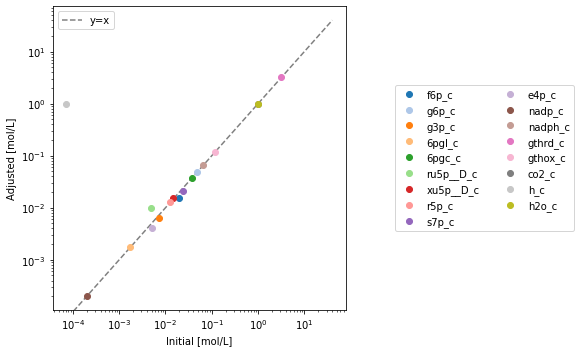

In [23]:
conc_comparison_fig, ax = plt.subplots(nrows=1, ncols=1,
                                       figsize=(5, 5))

plot_comparison(
    x=ic_info["concentrations"], y=conc_solution,
    compare="concentrations",
    observable=[mid for mid in ic_info.index], ax=ax,
    legend="right outside", plot_function="loglog",
    # xlim=(1e-6,0.02), ylim=(1e-6,1e-1),
    xy_line=True,
    xy_legend="best", xlabel="Initial [mol/L]", ylabel="Adjusted [mol/L]")

conc_comparison_fig.tight_layout()


In [24]:
update_model_with_concentration_solution(
    ppp, conc_solution, concentrations=True, inplace=True);

In [25]:
conc_solution_adjusted = conc_solution.to_frame()
conc_fig_df = pd.DataFrame()
conc_fig_df["Initial"] = ic_info["concentrations"]
conc_fig_df["Adjusted"] = conc_solution_adjusted["variables"]
conc_fig_df["Metabolite"] = ic_info.index
# conc_fig_df

mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [30]:
line_min = conc_fig_df.min()
line_min

Initial       0.000071
Adjusted        0.0002
Metabolite     _6pgc_c
dtype: object

In [26]:
conc_fig_comp = alt.Chart(conc_fig_df).mark_circle(size= 100).encode(
    alt.X("Initial", axis=alt.Axis( tickCount=0), scale=alt.Scale(type='log')),
    alt.Y('Adjusted',axis=alt.Axis( tickCount=5), 
    scale=alt.Scale(type='log')), 

    alt.Color('Metabolite', scale=alt.Scale(scheme='turbo')), 
    tooltip=['Metabolite', "Initial", "Adjusted"]
).properties(
    width=400,
    height=400).interactive()
conc_fig_comp

alt.Chart(...)

 Getting Standard and Physiological Gibbs energies of reactions

In [27]:
#  possibly running comparison tests b/w equilibrator and published values?


Caluclation of percs

In [31]:
percs = ppp.calculate_PERCs(update_reactions=True)

print("Forward Rate Constants\n----------------------")
for reaction in ppp.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

percs_df = pd.DataFrame.from_dict(percs, orient='index', columns = ["OG"])


Forward Rate Constants
----------------------
kf_G6PDH2r: 21864.589249
kf_PGL: 122.323112
kf_GND: 30666.240679
kf_RPE: 21.447036
kf_RPI: 12.332046
kf_TKT1: 524.533765
kf_TKT2: 1279.739043
kf_TALA: 812.501037
kf_GTHOr: 53.329812
kf_GSHR: 0.041257
kf_SK_g6p_c: 0.220727
kf_DM_f6p_c: 8.490163
kf_DM_g3p_c: 10.621788
kf_DM_r5p_c: 0.761893
kf_SK_co2_c: 100000.000000
kf_SK_h_c: 0.840053
kf_SK_h2o_c: 100000.000000


### Perc sampling

In [32]:
seed = int(1)
n_models = 1500

first trying with 1 order of magnitude

In [33]:
conc_solver.setup_sampling_problem(
    fixed_conc_bounds=list(ppp.fixed),
    # fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    )
for variable in conc_solver.variables:
    try:
        met = ppp.metabolites.get_by_id(variable.name)
        variable.lb, variable.ub = np.log([met.ic / 5, met.ic * 5])
    except:
        pass
conc_samples = sample_concentrations(conc_solver, n=n_models,  processes=4, seed=seed)
conc_samples.head()


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpukl36rn2.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpsk3fc962.lp
Reading time = 0.00 seconds
: 10 rows, 27 columns, 48 nonzeros


,f6p_c,g6p_c,g3p_c,_6pgl_c,_6pgc_c,ru5p__D_c,xu5p__D_c,r5p_c,s7p_c,e4p_c,nadp_c,nadph_c,gthrd_c,gthox_c,co2_c,h_c,h2o_c
0,0.005953,0.074873,0.010471,0.007131,0.100540,0.019360,0.031487,0.012001,0.009343,0.005292,0.000094,0.058698,5.886696,0.588255,2.470588,0.929752,0.224323
1,0.025062,0.093345,0.007635,0.001966,0.177424,0.020512,0.026295,0.024732,0.055865,0.002019,0.000056,0.017025,1.737244,0.287104,2.629036,1.123970,0.335853
2,0.007588,0.021810,0.002835,0.000461,0.014337,0.005541,0.007962,0.005624,0.010161,0.000966,0.000074,0.017233,1.352215,0.269620,2.893608,1.928133,0.269581
3,0.005223,0.010488,0.014661,0.004915,0.080380,0.011035,0.019092,0.008104,0.005002,0.004591,0.000262,0.033777,6.159479,0.546979,2.724990,2.008564,2.887573
4,0.006143,0.014220,0.012927,0.001855,0.087122,0.029563,0.054461,0.013253,0.012363,0.002124,0.000115,0.022686,4.064635,0.113316,0.717214,1.346224,3.021963


In [34]:
boundary_metabolites = []
for m in ppp.boundary:
    for i in (m.metabolites.keys()):
        if str(i) not in boundary_metabolites:
            boundary_metabolites.append(str(i))
            print(i)

g6p_c
f6p_c
g3p_c
r5p_c
co2_c
h_c
h2o_c


In [35]:
metabolite_ids = [m.id for m in ppp.metabolites]
misbalance= pd.DataFrame(
    ppp.S.dot(np.array(list(ppp.steady_state_fluxes.values()))),
    index=metabolite_ids,
    columns=[r"$\textbf{Sv}_{\mathrm{stst}}$"])
misbalance.T

,f6p_c,g6p_c,g3p_c,_6pgl_c,_6pgc_c,ru5p__D_c,xu5p__D_c,r5p_c,s7p_c,e4p_c,nadp_c,nadph_c,gthrd_c,gthox_c,co2_c,h_c,h2o_c
$\textbf{Sv}_{\mathrm{stst}}$,0.0,0.0,0.0,0.0,0.0,4.163336e-17,0.0,-5.204170e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Determine imbalances in the reduced network
fluxes = np.array(list(ppp.steady_state_fluxes.values()))
imbalanced_metabolites = ppp.S.dot(fluxes)

# Iterate through metabolites
for mid, imbalance in imbalanced_metabolites.iteritems():
    met = ppp.metabolites.get_by_id(mid)
    if imbalance != 0:
        if str(mid) not in boundary_metabolites:
            print(mid)

ru5p__D_c


In [37]:
models_for_ensemble = []
for idx, conc_sample in conc_samples.iterrows():
    # Make copy of new model
    new_model = ppp.copy()
    new_model.id += "_C{0:d}".format(idx)
    # Get concentration sample and update model with sample
    new_model.update_initial_conditions(conc_sample.to_dict())

    # Determine imbalances in the reduced network
    fluxes = np.array(list(new_model.steady_state_fluxes.values()))
    imbalanced_metabolites = new_model.S.dot(fluxes)

    # Iterate through metabolites
    for mid, imbalance in imbalanced_metabolites.iteritems():
        # Ignore balanced metabolites
        if imbalance == 0:
            continue
        # Get metabolite object
        met = new_model.metabolites.get_by_id(mid)
        if str(mid) not in boundary_metabolites:
            # print(mid)
            # Add boundary reactions for imbalanced metabolites
            boundary_type = "sink"    
            # Add boundary reaction with imbalance as flux value
            boundary_reaction = new_model.add_boundary(
                mid, boundary_type, boundary_condition=met.ic)

            boundary_reaction.Keq = 1
            if imbalance < 0:
                boundary_reaction.reverse_stoichiometry(inplace=True)
                imbalance = -imbalance

            boundary_reaction.kf = imbalance / met.ic
            boundary_reaction.steady_state_flux = imbalance
            try:
                # Update PERCs
                percs = new_model.calculate_PERCs(
                    fluxes={
                        r: v for r, v in new_model.steady_state_fluxes.items()
                        if not r.boundary},
                    update_reactions=True)
            except:
                print("Negative PERCs for {0}".format(new_model.id))
                continue




    df_p = pd.DataFrame.from_dict(percs, orient='index')
    df_p.columns = [("No."+ str(idx))]
    percs_df = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)
        # except:
        #     print("Negative PERCs for {0}".format(new_model.id))

        #     df_p = pd.DataFrame.from_dict(percs, orient='index')
        #     df_p.columns = [("No."+ str(idx))]
        #     percs_df = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)
        #     percs_df = pd.join([percs_df, df_p])
            
        #     continue



        
    models_for_ensemble.append(new_model)
print("Number of models in ensemble: {0:d}".format(
    len(models_for_ensemble)))

Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpa0yibqpc.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpzxczam9w.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpmijafiyl.lp
Reading time = 0.01 seconds
: 10 rows, 27 columns, 48 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpkidh06d0.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpwvj70kr7.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpd7tb7ubg.lp
Reading time = 0.00 seconds
: 10 rows, 27 columns, 48 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpl20w_x8d.lp
Reading time = 0.00 seconds
: 17 rows, 34 columns, 90 nonzeros

#### Trying to simulate

In [46]:
mass.simulation.simulation.RR_LOGGER = False

In [47]:
# Disable gurobi logging output for this notebook.
try:
    import gurobipy
    gurobipy.setParam("OutputFlag", 0)
except ImportError:
    pass

In [40]:
# Set the logger
from mass.util.util import (
    _check_kwargs,
    _log_msg,
    _make_logger,
    apply_decimal_precision,
    ensure_iterable,
)
MASSCONFIGURATION = MassConfiguration()
# If working in Python application (e.g. iPython notebooks), enable logging

# Set the logger
import roadrunner
LOGGER = _make_logger(__name__)

"""logging.Logger: Logger for :mod:`~mass.simulation.simulation` submodule."""


RR_LOGGER = roadrunner.Logger

"""roadrunner.Logger: The logger for the :mod:`roadrunner`."""
RR_LOGGER.disableLogging()

In [41]:
percs = glycolysis.calculate_PERCs(update_reactions=True)
percs_df_sim = pd.DataFrame.from_dict(percs, orient='index', columns = ["OG"])

In [49]:
# Ensure all models are simulated to a long time and that
# there are enough time points to determine if model reached steady state.
tfinal = 1e4
verbose = False
sim = Simulation(reference_model=models_for_ensemble[0], verbose=verbose)
sim.add_models(models_for_ensemble[1:], verbose=verbose, disable_safe_load=True)
sim.integrator.absolute_tolerance = 1e-15
sim.integrator.relative_tolerance = 1e-9

models_to_export = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for model in models_for_ensemble:
        # Attempt to determine steady state
        conc_sol, flux_sol = sim.find_steady_state(
            models=model, strategy="simulate", update_values=True,
            tfinal=tfinal, 
            verbose=verbose)
        if conc_sol and flux_sol:
            continue
        print(str(model) + " first attempt failed.")
        # First attempt was not successful, lengthen time for second attempt
        # Attempt to determine steady state
        conc_sol, flux_sol = sim.find_steady_state(
            models=model, strategy="simulate", update_values=True,
            tfinal=tfinal * 10, 
            verbose=verbose)
        if conc_sol and flux_sol:
            continue
        print(str(model) + " second attempt failed.")
        # Second attempt was not successful, lengthen time for second attempt
        # Attempt to determine steady state
        conc_sol, flux_sol = sim.find_steady_state(
            models=model, strategy="simulate", update_values=True,
            tfinal=tfinal * 100, 
            verbose=verbose)
        
        if conc_sol and flux_sol:
            sim_percs = pd.DataFrame()
            for r in model.reactions:
                sim_percs.loc[len(sim_percs.index)] = [r.id, r.kf]
                sim_percs.columns = [("No."+ str(model))]
            percs_df_sim = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)
            continue
        print(str(model) + " third attempt failed. Eliminating model.")
        # Third attempt was not successful, eliminate the model
        sim.remove_models(models=model, verbose=verbose)

ERROR: Unable to find a steady state for 'Glycolysis_C31' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C31", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C31' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C31", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C31 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C31' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C31", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C31 second attempt failed.
Glycolysis_C31 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C39' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C39", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C39' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C39", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C39 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C39' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C39", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C39 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C40' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C40", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C39 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C40' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C40", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C40 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C40' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C40", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C40 second attempt failed.
Glycolysis_C40 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C42' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C42", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C42' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C42", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C42 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C42' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C42", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C42 second attempt failed.
Glycolysis_C42 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C80' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C80", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C80' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C80", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C80 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C80' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C80", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C80 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C81' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C81", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C80 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C81' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C81", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C81 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C81' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C81", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C81 second attempt failed.
Glycolysis_C81 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C85' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C85", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C85' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C85", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C85 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C85' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C85", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C85 second attempt failed.
Glycolysis_C85 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C89' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C89", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C89' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C89", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C89 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C89' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C89", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C89 second attempt failed.
Glycolysis_C89 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C91' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C91", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C91' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C91", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C91 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C91' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C91", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C91 second attempt failed.
Glycolysis_C91 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C93' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C93", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C93' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C93", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C93 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C93' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C93", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C93 second attempt failed.
Glycolysis_C93 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C99' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C99", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C99' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C99", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C99 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C99' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C99", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C99 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C100' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C100", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C99 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C100' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C100", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C100 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C100' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C100", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C100 second attempt failed.
Glycolysis_C100 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C124' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C124", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C124' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C124", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C124 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C124' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C124", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C124 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C125' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C125", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C124 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C125' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C125", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C125 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C125' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C125", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C125 second attempt failed.
Glycolysis_C125 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C156' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C156", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C156' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C156", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C156 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C156' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C156", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C156 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C157' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C157", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C156 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C157' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C157", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C157 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C157' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C157", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C157 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C158' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C158", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C157 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C158' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C158", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C158 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C158' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C158", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C158 second attempt failed.
Glycolysis_C158 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C163' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C163", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C163' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C163", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C163 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C163' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C163", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C163 second attempt failed.
Glycolysis_C163 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C165' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C165", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C165' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C165", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C165 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C165' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C165", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C165 second attempt failed.
Glycolysis_C165 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C170' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C170", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C170' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C170", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C170 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C170' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C170", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C170 second attempt failed.
Glycolysis_C170 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C182' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C182", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C182' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C182", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C182 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C182' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C182", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C182 second attempt failed.
Glycolysis_C182 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C199' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C199", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C199' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C199", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C199 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C199' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C199", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C199 second attempt failed.
Glycolysis_C199 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C222' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C222", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C222' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C222", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C222 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C222' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C222", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C222 second attempt failed.
Glycolysis_C222 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C252' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C252", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C252' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C252", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C252 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C252' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C252", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C252 second attempt failed.
Glycolysis_C252 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C296' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C296", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C296' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C296", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C296 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C296' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C296", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C296 second attempt failed.
Glycolysis_C296 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C305' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C305", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C305' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C305", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C305 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C305' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C305", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C305 second attempt failed.
Glycolysis_C305 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C307' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C307", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C307' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C307", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C307 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C307' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C307", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C307 second attempt failed.
Glycolysis_C307 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C322' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C322", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C322' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C322", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C322 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C322' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C322", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C322 second attempt failed.
Glycolysis_C322 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C377' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C377", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C377' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C377", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C377 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C377' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C377", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C377 second attempt failed.
Glycolysis_C377 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C379' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C379", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C379' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C379", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C379 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C379' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C379", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C379 second attempt failed.
Glycolysis_C379 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C381' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C381", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C381' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C381", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C381 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C381' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C381", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C381 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C382' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C382", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C381 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C382' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C382", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C382 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C382' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C382", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C382 second attempt failed.
Glycolysis_C382 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C390' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C390", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C390' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C390", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C390 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C390' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C390", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C390 second attempt failed.
Glycolysis_C390 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C403' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C403", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C403' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C403", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C403 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C403' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C403", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C403 second attempt failed.
Glycolysis_C403 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C413' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C413", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C413' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C413", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C413 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C413' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C413", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C413 second attempt failed.
Glycolysis_C413 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C426' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C426", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C426' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C426", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C426 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C426' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C426", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C426 second attempt failed.
Glycolysis_C426 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C437' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C437", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C437' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C437", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C437 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C437' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C437", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C437 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C438' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C438", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C437 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C438' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C438", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C438 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C438' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C438", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C438 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C439' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C439", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C438 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C439' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C439", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C439 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C439' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C439", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C439 second attempt failed.
Glycolysis_C439 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C442' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C442", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C442' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C442", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C442 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C442' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C442", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C442 second attempt failed.
Glycolysis_C442 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C482' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C482", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C482' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C482", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C482 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C482' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C482", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C482 second attempt failed.
Glycolysis_C482 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C488' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C488", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C488' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C488", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C488 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C488' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C488", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C488 second attempt failed.
Glycolysis_C488 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C523' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C523", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C523' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C523", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C523 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C523' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C523", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C523 second attempt failed.
Glycolysis_C523 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C530' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C530", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C530' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C530", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C530 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C530' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C530", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C530 second attempt failed.
Glycolysis_C530 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C533' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C533", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C533' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C533", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C533 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C533' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C533", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C533 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C534' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C534", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C533 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C534' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C534", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C534 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C534' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C534", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C534 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C535' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C535", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C534 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C535' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C535", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C535 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C535' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C535", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C535 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C536' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C536", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C535 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C536' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C536", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C536 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C536' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C536", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C536 second attempt failed.
Glycolysis_C536 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C539' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C539", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C539' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C539", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]']" is greater than the steady state threshold.


Glycolysis_C539 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C539' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C539", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C539 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C540' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C540", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C539 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C540' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C540", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C540 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C540' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C540", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C540 second attempt failed.
Glycolysis_C540 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C598' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C598", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C598' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C598", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C598 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C598' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C598", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C598 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C599' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C599", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C598 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C599' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C599", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C599 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C599' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C599", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C599 second attempt failed.
Glycolysis_C599 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C610' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C610", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C610' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C610", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C610 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C610' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C610", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C610 second attempt failed.
Glycolysis_C610 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C629' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C629", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C629' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C629", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C629 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C629' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C629", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C629 second attempt failed.
Glycolysis_C629 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C655' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C655", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C655' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C655", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C655 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C655' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C655", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C655 second attempt failed.
Glycolysis_C655 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C673' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C673", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C673' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C673", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C673 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C673' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C673", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C673 second attempt failed.
Glycolysis_C673 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C677' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C677", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C677' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C677", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C677 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C677' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C677", absolute difference for "['[glc__D_c]']" is greater than the steady state threshold.


Glycolysis_C677 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C678' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C678", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C677 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C678' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C678", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C678 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C678' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C678", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C678 second attempt failed.
Glycolysis_C678 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C683' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C683", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C683' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C683", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C683 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C683' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C683", absolute difference for "['[glc__D_c]', '[g6p_c]']" is greater than the steady state threshold.


Glycolysis_C683 second attempt failed.
Glycolysis_C683 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C694' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C694", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C694' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C694", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C694 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C694' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C694", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C694 second attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C695' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C695", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C694 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C695' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C695", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C695 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C695' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C695", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C695 second attempt failed.
Glycolysis_C695 third attempt failed. Eliminating model.


ERROR: Unable to find a steady state for 'Glycolysis_C701' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C701", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.
ERROR: Unable to find a steady state for 'Glycolysis_C701' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C701", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C701 first attempt failed.


ERROR: Unable to find a steady state for 'Glycolysis_C701' using strategy 'simulate' due to the following: For MassModel "Glycolysis_C701", absolute difference for "['[glc__D_c]', '[g6p_c]', '[f6p_c]', '[fdp_c]', '[dhap_c]']" is greater than the steady state threshold.


Glycolysis_C701 second attempt failed.
Glycolysis_C701 third attempt failed. Eliminating model.


In [ ]:
percs_df_sim

,OG
kf_HEX1,0.978329
kf_PGI,26.177931
kf_PFK,68.917047
kf_FBA,91.989074
kf_TPI,10.794445
kf_GAPD,4291.312229
kf_PGK,29487.028034
kf_PGM,36.477347
kf_ENO,513.928049
kf_PYK,466.473991


In [111]:
from mass.io.sbml import write_sbml_model
# from table_export import export_csv_files_for_models

In [110]:
# models_to_export = sim.get_model_objects(models=sim.models)
# for model in models_to_export:
#     # Save as JSON
#     save_json_mass_model(
#         mass_model=model,
#         filename=os.path.abspath(
#             os.path.join(
#                 model_dir, "JSON", model.id + ".json")))
#     # Save as SBML
#     write_sbml_model(
#         mass_model=model,
#         filename=os.path.abspath(
#             os.path.join(
#                 model_dir, "SBML", model.id + ".xml.zip")))
# Export tables
# export_csv_files_for_models(
    # models_to_export)
print("Number of models exported: {0:d}".format(len(sim.models)))

Number of models exported: 1326


### Forming Percs Dataframe

In [38]:
percs_df.index.names = ['RXN']
percs_df

,OG,No.0,No.1,No.2,No.3,No.4,No.5,No.6,No.7,No.8,...,No.1490,No.1491,No.1492,No.1493,No.1494,No.1495,No.1496,No.1497,No.1498,No.1499
RXN,,,,,,,,,,,,,,,,,,,,,
kf_G6PDH2r,21864.589249,31872.524725,40165.056914,131272.620456,81221.958979,131531.206667,19999.860274,27367.729079,75378.334083,16152.364320,...,56025.447005,82613.812899,20583.825100,22842.698919,16642.772458,13573.813245,13203.625736,11735.237965,15631.912635,11751.825237
kf_PGL,122.323112,29.869850,117.434733,469.985461,43.435168,118.814580,76.997326,409.193078,60.379633,24.723005,...,126.241486,467.741667,709.463906,566.654733,398.954790,278.075862,198.600234,190.952330,296.601814,465.055921
kf_GND,30666.240679,31808.973116,23119.171432,269065.772777,10462.621088,21969.943734,7803.629618,14458.023636,9646.786242,7188.625107,...,38650.686769,61496.631934,19190.323004,17718.457570,25537.012777,17288.356224,21408.968620,24458.086674,24570.161049,20104.281854
kf_RPE,21.447036,11.182185,9.323209,36.420809,20.430663,7.983838,10.311078,22.120265,9.680610,6.920632,...,3.654322,3.316171,2.816929,3.017094,4.052815,3.175601,3.016270,2.948131,3.122703,4.465903
kf_RPI,12.332046,4.776104,5.598614,19.209313,8.710892,2.958997,4.313930,10.804726,4.179975,2.789312,...,3.298950,2.350538,1.998528,2.165063,3.289852,2.604433,2.709220,2.432034,2.469208,3.663578
kf_TKT1,524.533765,206.959135,163.686847,2350.189829,590.308057,105.700172,173.515578,611.857822,345.333329,137.431776,...,425.077668,636.079952,414.026760,444.886822,673.500710,420.368933,300.010095,296.667360,404.934326,623.003231
kf_TKT2,1279.739043,415.199480,1931.281236,11895.125325,831.192014,617.482415,439.139659,2268.525689,2271.815309,540.818231,...,2794.507506,2907.869986,2244.307899,2402.188493,2223.296875,1289.243548,940.661829,856.741228,1232.462683,2047.217115
kf_TALA,812.501037,900.497848,171.692202,2865.808414,1207.290807,444.590145,359.016099,1712.945256,1935.581980,1477.467160,...,875.611261,2652.432200,1745.182403,1818.040799,1592.547337,832.981596,480.110072,629.213167,884.932444,1821.504921
kf_GTHOr,53.329812,12.174973,85.953974,90.420239,22.856328,164.596523,207.571657,14.938532,62.793360,100.100156,...,35.278288,60.639158,22.423193,23.096757,42.308438,53.650330,55.608067,54.287350,56.077168,22.614579


In [41]:
csv_percs = os.path.join(data_dir,"rbc_percs_ppp.csv")
percs_df.to_csv(csv_percs)

### Percs Workflow

Log transforming it

In [42]:
# csv_percs = os.path.join(data_dir,"percs_df.csv")
og_percs_df = pd.read_csv(csv_percs,index_col="RXN")
percs_df = og_percs_df.copy()
# csv_percs

In [43]:
data_log = np.log(percs_df)
data_log

,OG,No.0,No.1,No.2,No.3,No.4,No.5,No.6,No.7,No.8,...,No.1490,No.1491,No.1492,No.1493,No.1494,No.1495,No.1496,No.1497,No.1498,No.1499
RXN,,,,,,,,,,,,,,,,,,,,,
kf_G6PDH2r,9.992624,10.369500,10.600753,11.785032,11.304941,11.786999,9.903481,10.217120,11.230275,9.689822,...,10.933561,11.321932,9.932261,10.036387,9.719731,9.515898,9.488247,9.370351,9.657070,9.371764
kf_PGL,4.806666,3.396850,4.765883,6.152702,3.771269,4.777564,4.343771,6.014187,4.100652,3.207734,...,4.838197,6.147916,6.564510,6.339750,5.988848,5.627894,5.291294,5.252024,5.692391,6.142158
kf_GND,10.330918,10.367504,10.048417,12.502711,9.255564,9.997431,8.962344,9.579005,9.174380,8.880255,...,10.562320,11.026738,9.862161,9.782362,10.147884,9.757789,9.971565,10.104716,10.109288,9.908688
kf_RPE,3.065586,2.414322,2.232507,3.595140,3.017037,2.077419,2.333219,3.096494,2.270125,1.934507,...,1.295911,1.198811,1.035647,1.104294,1.399412,1.155497,1.104021,1.081172,1.138699,1.496471
kf_RPI,2.512201,1.563625,1.722519,2.955395,2.164574,1.084850,1.461849,2.379984,1.430305,1.025795,...,1.193604,0.854644,0.692411,0.772450,1.190843,0.957215,0.996661,0.888728,0.903898,1.298440
kf_TKT1,6.262510,5.332521,5.097955,7.762251,6.380645,4.660607,5.156267,6.416500,5.844510,4.923128,...,6.052272,6.455324,6.025931,6.097820,6.512489,6.041133,5.703816,5.692612,6.003725,6.434552
kf_TKT2,7.154411,6.028759,7.565939,9.383884,6.722861,6.425651,6.084817,7.726885,7.728334,6.293083,...,7.935411,7.975176,7.716152,7.784135,7.706746,7.161811,6.846584,6.753136,7.116770,7.624237
kf_TALA,6.700117,6.802948,5.145703,7.960606,7.096134,6.097153,5.883367,7.445970,7.568163,7.298085,...,6.774922,7.883232,7.464614,7.505515,7.373090,6.725012,6.174015,6.444470,6.785511,7.507418
kf_GTHOr,3.976495,2.499382,4.453812,4.504468,3.129228,5.103497,5.335477,2.703944,4.139849,4.606171,...,3.563268,4.104941,3.110096,3.139692,3.744987,3.982488,4.018328,3.994291,4.026729,3.118595


In [44]:
from scipy import stats
from sklearn import cluster, metrics, decomposition # these will be useful
import seaborn as sns
import sklearn

In [60]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

def PCA_cluster_plot(data, cluster_labels, ax = None):
    """
    Parameters:
        data: the pd.DataFrame of gene expression data
        cluster_labels: a pd.Series with a cluster label
            for each column of data
        ax: if None, draw a new figure. else, populate these axes.
    Returns:
        ax: the plt.axes object of a PCA plot labeled by cluster
    """
    
    # check for bad input
    if isinstance(cluster_labels, pd.Series):
        if not(cluster_labels.index.equals(data.columns)):
            raise ValueError('cluster_labels.index doesn\'t match data.columns')
    else:
        raise TypeError('cluster_labels isn\'t a pd.Series')
    
    # compute PCA, save as dataframe with condition labels
    # data_norm = stats.zscore(data, axis=1)
    data_norm = sklearn.preprocessing.normalize(data,norm='l2')
    data_pc = PCA().fit_transform(data_norm.T)
    data_pc = pd.DataFrame(data_pc, index = data.columns)
    
    # get the unique clusters (supports naming if desired)
    unique_clusters = np.sort(cluster_labels.unique())
    
    # prepare a long list of colors
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
              'tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan',
              'black', 'salmon', 'chocolate', 'orange', 'gold', 'lawngreen',
              'turquoise', 'steelblue', 'navy', 'violet', 'deeppink',
              'firebrick', 'sandybrown','olivedrab','darkgreen', 'aqua',
              'slategray', 'blue', 'fuschia', 'pink']
    
    # this code only runs if you have a ton of labels
    while len(colors) < len(cluster_labels.unique()):
        colors = colors + colors
    
    # make the plot
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_xlabel('PC1', fontsize = 16)
    ax.set_ylabel('PC2', fontsize = 16)
    
    # iterate through each cluster label
    for clust, color in zip(unique_clusters, colors):
        
        # get the samples of this cluster
        samples = cluster_labels.index[cluster_labels == clust]
        
        # add to plot
        ax.scatter(data_pc.loc[samples, 0],
                   data_pc.loc[samples, 1],
                   label = clust, color = color)
    
    # add legend
    ax.legend(bbox_to_anchor = (1,0))
    for i in range(data_pc.shape[0]):
        plt.text(x=data_pc.iloc[i,0]+0.1,y=data_pc.iloc[i,1]+0.05,s=data_pc.index[i])
    return ax

In [48]:
# create a DataFrame to store all the clusters
k_range = range(2, 10)
elbow_df = pd.DataFrame(index = data_log.index, 
                        columns = k_range)

# compute the clusters at each k
for k in k_range:
    
    # repeat code from problem 1.2.1
    k_clusters = cluster.KMeans(n_clusters = k, random_state = 1)
    k_clusters = k_clusters.fit(data_log)
    
    # store in DataFrame
    elbow_df[k] = k_clusters.labels_

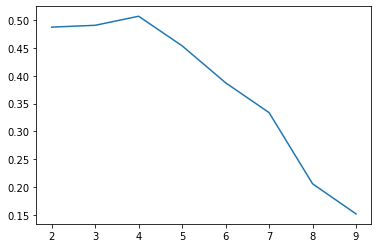

In [49]:
# compute the silhouette scores
k_silhouette = pd.Series(index = k_range, dtype=float)

for k in k_range:
    k_silhouette[k] = metrics.silhouette_score(data_log, elbow_df[k])
    
# plot
fig, ax = plt.subplots()
ax.plot(k_range, k_silhouette)

In [102]:
# output, look at plot, and pick the best k
# I think it is k = 4
# so I'll draw it on now
# best_k = 4
# ax.scatter(best_k, k_silhouette[best_k], color = 'r', s = 50)
# ax.set_xlabel('K')
# ax.set_ylabel('Silhouette Score')

# print('Optimal K =', best_k)

In [50]:
mean_silhouette = pd.Series(index = k_range, dtype=float)

# increase this number to make the curve smoother
# requires a lot of time to run
num_repeats = 10

for k in k_range:
    k_scs = []
    for i in range(num_repeats):
        # DO NOT specify a random state so we intentionally 
        # get different results
        k_clusters = cluster.KMeans(n_clusters = k)
        k_clusters = k_clusters.fit(percs_df.T)
        
        # add this silhouette score
        k_scs += [metrics.silhouette_score(percs_df.T, k_clusters.labels_)]
    
    # take the mean silhouette score
    mean_silhouette[k] = np.mean(k_scs)

In [52]:
X = percs_df
distorsions = []
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

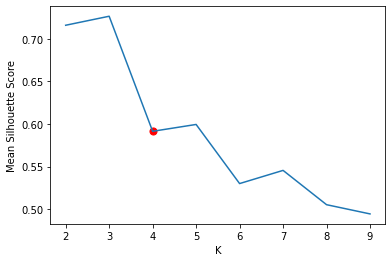

In [53]:
fig, ax = plt.subplots()
ax.plot(k_range, mean_silhouette)
ax.set_xlabel('K')
ax.set_ylabel('Mean Silhouette Score')


# this reduces our k slightly
best_k = 5
ax.scatter(best_k, mean_silhouette[best_k], color = 'r', s = 50)

In [102]:
k10_clusters = cluster.KMeans(n_clusters =5, random_state = 1)

# compute the clusters
# use the transpose of the data to get samples instead of genes
k10_clusters = k10_clusters.fit(data_log)

# label the output with condition names
k10_labels = pd.Series(k10_clusters.labels_, index = data_log.index)

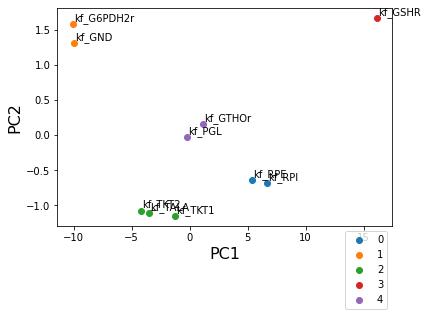

In [103]:
# ANSWER    

ax = PCA_cluster_plot(data_log.T, k10_labels)

In [104]:
data_norm = sklearn.preprocessing.normalize(data_log.T,norm='l2')
data_pc = PCA().fit_transform(data_norm.T)
data_pc = pd.DataFrame(data_pc, index = data_log.index)
plot_data = data_pc.iloc[:,0:2]
plot_data.columns = ["PC1", "PC2"]
plot_data["RXN"] = plot_data.index
plot_data["clusters"] = k10_labels
alt.data_transformers.disable_max_rows()
fig = alt.Chart(plot_data).mark_circle(size= 100).encode(
    alt.X("PC1", axis=alt.Axis( tickCount=5)),
    alt.Y('PC2',axis=alt.Axis( tickCount=5), ), 

    alt.Color('clusters', scale=alt.Scale(scheme='turbo')), 
    tooltip=['RXN']
).properties(
    width=400,
    height=400).interactive()
fig

C:\Users\sicil\AppData\Local\Temp\ipykernel_18808\4012768921.py:6 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sicil\AppData\Local\Temp\ipykernel_18808\4012768921.py:7 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


alt.Chart(...)

In [ ]:
# loo

### Making distributions for percs

In [72]:
data_norm = sklearn.preprocessing.normalize(percs_df,norm='l2')
data_norm= pd.DataFrame(data_norm)
data_norm = data_norm.T
data_norm.columns = [data_log.index]
data_norm

RXN,kf_G6PDH2r,kf_PGL,kf_GND,kf_RPE,kf_RPI,kf_TKT1,kf_TKT2,kf_TALA,kf_GTHOr,kf_GSHR
0,0.007172,0.011193,0.011397,0.049369,0.054725,0.023504,0.011925,0.010771,0.005236,0.003409
1,0.010455,0.002733,0.011821,0.025740,0.021195,0.009274,0.003869,0.011938,0.001195,0.001010
2,0.013175,0.010746,0.008592,0.021461,0.024845,0.007335,0.017996,0.002276,0.008439,0.012074
3,0.043060,0.043005,0.099996,0.083838,0.085244,0.105308,0.110839,0.037991,0.008878,0.020491
4,0.026643,0.003974,0.003888,0.047030,0.038656,0.026451,0.007745,0.016005,0.002244,0.000921
...,...,...,...,...,...,...,...,...,...,...
1496,0.004453,0.025445,0.006425,0.007310,0.011558,0.018836,0.012013,0.011042,0.005268,0.154793
1497,0.004331,0.018173,0.007956,0.006943,0.012023,0.013443,0.008765,0.006365,0.005460,0.189583
1498,0.003849,0.017473,0.009090,0.006786,0.010792,0.013293,0.007983,0.008341,0.005330,0.156422
1499,0.005128,0.027140,0.009131,0.007188,0.010957,0.018144,0.011484,0.011731,0.005506,0.124665


In [73]:
data_vis = percs_df.T.melt()
data_vis.columns = ["RXN", "val"]

In [74]:
alt.data_transformers.disable_max_rows()
fig = alt.Chart(data_vis).mark_circle(size= 100).encode(
    alt.X("RXN", axis=alt.Axis( tickCount=5), scale=alt.Scale(type='log')),
    alt.Y('val',axis=alt.Axis( tickCount=5), 
    scale=alt.Scale(type='log')), 

    alt.Color('RXN', scale=alt.Scale(scheme='turbo')), 
    tooltip=['RXN', "val"]
).properties(
    width=400,
    height=400).interactive()
fig

alt.Chart(...)

In [125]:
# Violin Plot of percs distribution without log tranforming
alt.data_transformers.disable_max_rows()
alt.Chart(data_vis).transform_density(
    'val',
    as_=['Value_column', 'density'],    
    extent=[-0.1, 1000],
    groupby=['RXN']
    ).mark_area(orient='horizontal').encode(
    y=alt.Y('Value_column:Q',axis=alt.Axis(grid=False,ticks=True)),
    color='RXN:N',
    x=alt.X('density:Q', stack='center',impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True)),
        tooltip=['RXN:N', "Value_column:Q"], 
    column=alt.Column(
        'RXN:N',header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0))
).properties(
    width=50).configure_facet(spacing=0).configure_view(stroke=None).interactive()

alt.Chart(...)

In [75]:
pca = decomposition.PCA().fit(data_norm.T)

# get the two important matrices & label them in pandas
pc_genes = pd.DataFrame(pca.components_,
                        columns = data_norm.index)
pc_samples = pd.DataFrame(pca.transform(data_norm.T),
                          index = data_norm.columns)

# get the explained variance, which will be useful later
exp_var = pca.explained_variance_ratio_

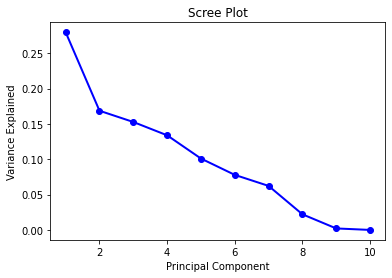

In [76]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [77]:
# get the cumulative variance
cum_var = exp_var.cumsum()

In [78]:
cum_var

array([0.27961571, 0.44818612, 0.60086443, 0.73469835, 0.83566468,
       0.91352898, 0.97579254, 0.9979046 , 1.        , 1.        ])

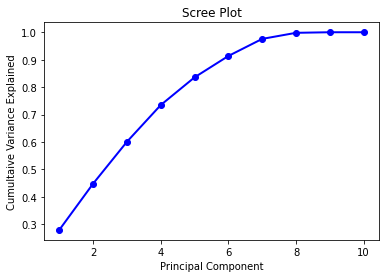

In [79]:
plt.plot(PC_values, cum_var, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumultaive Variance Explained')
plt.show()

Components to capture at least 80% of variance:  5


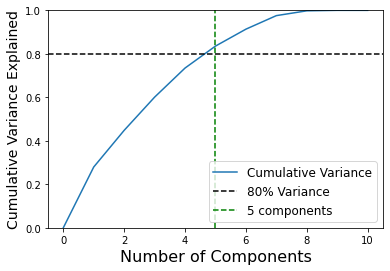

In [80]:
# find the number of components
index_80 = sum(cum_var <= 0.8)

# indices are zero-indexed, so the total number is one more than this
print('Components to capture at least 80% of variance: ', index_80+1)

# add a zero at the start so the plot extends all the way down
cum_var_plot = [0] + list(cum_var)

# plot
fig, ax = plt.subplots()
ax.plot(range(len(cum_var_plot)), cum_var_plot, label = 'Cumulative Variance')

# add some lines to illustrate the question
ax.axhline(0.8, color = 'k', linestyle = '--', label = '80% Variance')
ax.axvline(index_80+1, color = 'g', linestyle = '--', label = str(index_80+1)+ ' components')

# limit the y axes
ax.set_ylim([0, 1])

# axes labels and legend
ax.set_xlabel('Number of Components', fontsize = 16)
ax.set_ylabel('Cumulative Variance Explained', fontsize = 14)
_ = ax.legend(fontsize = 12)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
df_st =  StandardScaler().fit_transform(percs_df.T)  
pd.DataFrame(df_st, columns=percs_df.T.columns).head(2)

RXN,kf_G6PDH2r,kf_PGL,kf_GND,kf_RPE,kf_RPI,kf_TKT1,kf_TKT2,kf_TALA,kf_GTHOr,kf_GSHR
0,-0.314495,-0.391332,-0.133244,1.943362,2.29722,0.356617,-0.233215,-0.288989,-0.41269,-0.387867
1,-0.163135,-0.856390,-0.113503,0.299221,-0.00914,-0.357147,-0.639842,-0.230203,-0.59985,-0.493404


In [83]:
pca_out = PCA().fit(df_st)
pca_out.explained_variance_ratio_
np.cumsum(pca_out.explained_variance_ratio_)
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = percs_df.T.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
kf_G6PDH2r,0.014260,0.616092,-0.324900,-0.070841,-0.349722,0.252105,0.561199,-0.093418,0.009061,0.005771
kf_PGL,-0.004526,-0.183409,-0.684765,-0.118803,0.656916,0.150833,0.109835,-0.129376,0.015031,0.002577
kf_GND,0.104201,0.640052,-0.153182,-0.264395,0.137696,-0.143656,-0.657784,0.116945,0.008331,0.009149
kf_RPE,0.457799,-0.037334,-0.070079,-0.105562,-0.040170,-0.477621,0.146560,-0.178444,-0.294196,-0.635109
kf_RPI,0.476111,-0.050338,-0.065856,-0.069858,-0.019931,-0.428916,0.173456,0.024042,-0.035237,0.738441
kf_TKT1,0.491304,-0.044825,0.013969,0.089715,-0.014641,0.151162,-0.021345,0.066583,0.829409,-0.180262
kf_TKT2,0.404545,-0.038208,-0.006435,0.130209,0.056299,0.417962,0.013883,0.692228,-0.397407,-0.052164
kf_TALA,0.379751,0.004676,0.129878,0.154441,-0.024436,0.473459,-0.256009,-0.665853,-0.256145,0.125602
kf_GTHOr,0.032304,0.347394,0.588479,-0.033476,0.639219,-0.002021,0.347050,-0.038175,0.014534,-0.011335


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

Generated correlation matrix plot for loadings

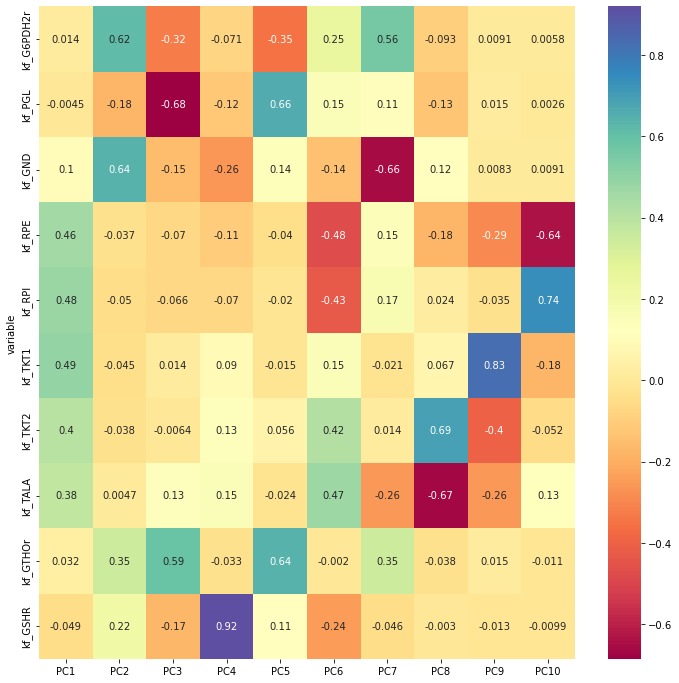

In [85]:
plt.figure(figsize= (12,12))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
heatmap_sns = os.path.join(data_dir,"heatmap.png")
# Saving figure by changing parameter values
plt.savefig(heatmap_sns, pad_inches=0.3)
plt.show()

In [89]:
from sklearn import cluster, metrics, decomposition

In [90]:
ica = decomposition.FastICA(n_components = None, random_state = 0)
A = ica.fit_transform(data_norm.T).transpose()

# these are the desired matrices
A = pd.DataFrame(A, columns = percs_df.index)
M = pd.DataFrame(ica.mixing_, index = percs_df.columns)

# reconstruct the data
data_norm_reconstructed = M.dot(A)

# compute the explained variance
ica_total_exp_var = metrics.explained_variance_score(
        data_norm, data_norm_reconstructed)
print('M*A explains %.2f%% of the variance in the data.'%(ica_total_exp_var*100))

M*A explains 0.00% of the variance in the data.


c:\Users\sicil\miniconda3\envs\massliver\lib\site-packages\sklearn\decomposition\_fastica.py:494 FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.


In [86]:
qcqa_model(ppp, parameters=True, concentrations=True,
           fluxes=True, superfluous=True, elemental=True)

╒══════════════════════════════════════════════╕
│ MODEL ID: PentosePhosphatePathway            │
│ SIMULATABLE: True                            │
│ PARAMETERS NUMERICALY CONSISTENT: True       │
╞══════════════════════════════════════════════╡
│ ============================================ │
│             CONSISTENCY CHECKS               │
│ ============================================ │
│ Elemental                                    │
│ -------------------                          │
│ GSHR: {charge: 2.0}                          │
│ ============================================ │
╘══════════════════════════════════════════════╛


Successfully loaded MassModel 'PentosePhosphatePathway' into RoadRunner.


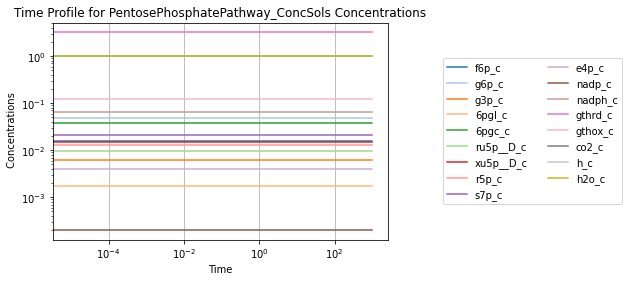

In [88]:
# Setup simulation object
sim = Simulation(ppp, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(ppp, time=(0, 1e3))
# Quickly render and display time profiles
conc_sol.view_time_profile()